In [59]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
customer = pd.read_csv("D:/Tableau_PowerBI/Ecommerce/ecommerce_customer.csv")
customer

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0
1,Caguas,Puerto Rico,Carol,3341,Consumer,PR,725.0
2,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
3,Mayaguez,Puerto Rico,Mary,7459,Consumer,PR,680.0
4,Caguas,Puerto Rico,Mary,10740,Consumer,PR,725.0
...,...,...,...,...,...,...,...
115741,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115742,Upland,United States,Victoria,8100,Corporate,CA,91786.0
115743,Los Angeles,United States,Mary,2666,Corporate,CA,90033.0
115744,Los Angeles,United States,Mary,9547,Corporate,CA,90027.0


In [61]:
order = pd.read_csv("D:/Tableau_PowerBI/Ecommerce/ecommerce_order.csv")
order

,additional_order_items,category_name,customer_id,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Camping & Hiking,Camping & Hiking,568,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Camping & Hiking,Camping & Hiking,3341,LATAM,18-04-2017,57472,South America,1,299.980011,-5.40%,-16.200001
2,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,3.90%,11.620000
3,Camping & Hiking,Camping & Hiking,7459,LATAM,24-05-2017,59898,Central America,1,299.980011,-1.10%,-3.390000
4,Hunting & Shooting,Hunting & Shooting,10740,LATAM,5/6/2017,58644,Central America,1,149.990005,-63.80%,-95.650002
...,...,...,...,...,...,...,...,...,...,...,...
115741,Water Sports,Water Sports,2666,USCA,13-04-2016,32105,US Center,1,199.990005,27.50%,55.090000
115742,Shop By Sport,Shop By Sport,8100,USCA,7/2/2016,37555,East of USA,1,39.990002,37.40%,14.940000
115743,Fishing,Fishing,2666,USCA,13-04-2016,32105,US Center,1,399.980011,39.80%,159.350006
115744,Fishing,Fishing,9547,USCA,8/6/2016,39980,West of USA,1,399.980011,24.90%,99.599998


##  Data Dictionary & Data Quality Assessment

### Merge data

In [62]:
customer_order = pd.merge(customer,order, on='customer_id', how='inner')
customer_order.head()

,customer_city,customer_country,customer_fname,customer_id,customer_segment,customer_state,customer_zipcode,additional_order_items,category_name,market,order_date,order_id,order_region,order_quantity,product_price,profit_margin,profit_per_order
0,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Camping & Hiking,Camping & Hiking,LATAM,17-06-2017,61558,South America,1,299.980011,26.10%,78.290001
1,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Indoor/Outdoor Games,Indoor/Outdoor Games,LATAM,17-06-2017,61558,South America,5,49.980000,31.30%,15.640000
2,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Men's Footwear,Men's Footwear,LATAM,17-06-2017,61558,South America,5,129.990005,30.10%,39.160000
3,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Kids' Golf Clubs,Kids' Golf Clubs,LATAM,17-06-2017,61558,South America,5,99.949997,-216.00%,-431.779999
4,Caguas,Puerto Rico,Sean,568,Consumer,PR,725.0,Women's Apparel,Women's Apparel,LATAM,17-06-2017,61558,South America,5,50.000000,13.90%,20.879999


### About data

In [63]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363790 entries, 0 to 1363789
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_city           1363790 non-null  object 
 1   customer_country        1363790 non-null  object 
 2   customer_fname          1363790 non-null  object 
 3   customer_id             1363790 non-null  int64  
 4   customer_segment        1363790 non-null  object 
 5   customer_state          1363790 non-null  object 
 6   customer_zipcode        1363787 non-null  float64
 7   additional_order_items  1351278 non-null  object 
 8   category_name           1363790 non-null  object 
 9   market                  1363790 non-null  object 
 10  order_date              1363790 non-null  object 
 11  order_id                1363790 non-null  int64  
 12  order_region            1363790 non-null  object 
 13  order_quantity          1363790 non-null  int64  
 14  pr

###  Check duplicate values

In [64]:
dup = customer_order[customer_order.duplicated()]
dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248048 entries, 14 to 1363789
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_city           1248048 non-null  object 
 1   customer_country        1248048 non-null  object 
 2   customer_fname          1248048 non-null  object 
 3   customer_id             1248048 non-null  int64  
 4   customer_segment        1248048 non-null  object 
 5   customer_state          1248048 non-null  object 
 6   customer_zipcode        1248048 non-null  float64
 7   additional_order_items  1236560 non-null  object 
 8   category_name           1248048 non-null  object 
 9   market                  1248048 non-null  object 
 10  order_date              1248048 non-null  object 
 11  order_id                1248048 non-null  int64  
 12  order_region            1248048 non-null  object 
 13  order_quantity          1248048 non-null  int64  
 14  produc

### Drop duplicate values

In [65]:
customer_order = customer_order.drop_duplicates()
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115742 entries, 0 to 1363787
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_city           115742 non-null  object 
 1   customer_country        115742 non-null  object 
 2   customer_fname          115742 non-null  object 
 3   customer_id             115742 non-null  int64  
 4   customer_segment        115742 non-null  object 
 5   customer_state          115742 non-null  object 
 6   customer_zipcode        115739 non-null  float64
 7   additional_order_items  114718 non-null  object 
 8   category_name           115742 non-null  object 
 9   market                  115742 non-null  object 
 10  order_date              115742 non-null  object 
 11  order_id                115742 non-null  int64  
 12  order_region            115742 non-null  object 
 13  order_quantity          115742 non-null  int64  
 14  product_price           

In [66]:
customer_order.to_csv('customer_order.csv', index=False)

### Convert data types

In [67]:
customer_order['customer_id'] = customer_order['customer_id'].astype('object')
customer_order['customer_zipcode'] = customer_order['customer_zipcode'].astype('object')
customer_order['order_id'] = customer_order['order_id'].astype('object')

In [68]:
## profit_margin
customer_order['profit_margin'] = customer_order['profit_margin'].str.replace('%', '', regex=True)
customer_order['profit_margin'] = customer_order['profit_margin'].astype('float')
customer_order['profit_margin'] = customer_order['profit_margin']*0.01


In [69]:
customer_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115742 entries, 0 to 1363787
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   customer_city           115742 non-null  object 
 1   customer_country        115742 non-null  object 
 2   customer_fname          115742 non-null  object 
 3   customer_id             115742 non-null  object 
 4   customer_segment        115742 non-null  object 
 5   customer_state          115742 non-null  object 
 6   customer_zipcode        115739 non-null  object 
 7   additional_order_items  114718 non-null  object 
 8   category_name           115742 non-null  object 
 9   market                  115742 non-null  object 
 10  order_date              115742 non-null  object 
 11  order_id                115742 non-null  object 
 12  order_region            115742 non-null  object 
 13  order_quantity          115742 non-null  int64  
 14  product_price           

### Missing Values

In [70]:
customer_order.isna().sum()

customer_city                0
customer_country             0
customer_fname               0
customer_id                  0
customer_segment             0
customer_state               0
customer_zipcode             3
additional_order_items    1024
category_name                0
market                       0
order_date                   0
order_id                     0
order_region                 0
order_quantity               0
product_price                0
profit_margin                0
profit_per_order             0
dtype: int64

In [71]:
customer_order.describe()

,order_quantity,product_price,profit_margin,profit_per_order
count,115742.000000,115742.000000,115742.000000,115742.000000
mean,2.551546,146.500997,0.108755,22.585058
std,1.683875,150.403614,0.419915,108.638207
min,1.000000,9.990000,-2.750000,-4274.979980
25%,1.000000,50.000000,0.062000,7.200000
50%,2.000000,99.989998,0.242000,32.040001
75%,4.000000,199.990005,0.336000,65.727503
max,5.000000,1999.989990,0.500000,911.799988


In [72]:
customer_order.nunique()

customer_city               563
customer_country              2
customer_fname              761
customer_id               18006
customer_segment              3
customer_state               46
customer_zipcode            995
additional_order_items       49
category_name                50
market                        5
order_date                  731
order_id                  42725
order_region                 23
order_quantity                5
product_price                75
profit_margin              1672
profit_per_order          19342
dtype: int64

In [73]:
customer_order.columns

Index(['customer_city', 'customer_country', 'customer_fname', 'customer_id',
       'customer_segment', 'customer_state', 'customer_zipcode',
       'additional_order_items', 'category_name', 'market', 'order_date',
       'order_id', 'order_region', 'order_quantity', 'product_price',
       'profit_margin', 'profit_per_order'],
      dtype='object')

## Univariate - Bivariate - Multivariate Analysis

array([[<AxesSubplot: title={'center': 'order_quantity'}>,
        <AxesSubplot: title={'center': 'product_price'}>],
       [<AxesSubplot: title={'center': 'profit_margin'}>,
        <AxesSubplot: title={'center': 'profit_per_order'}>]],
      dtype=object)

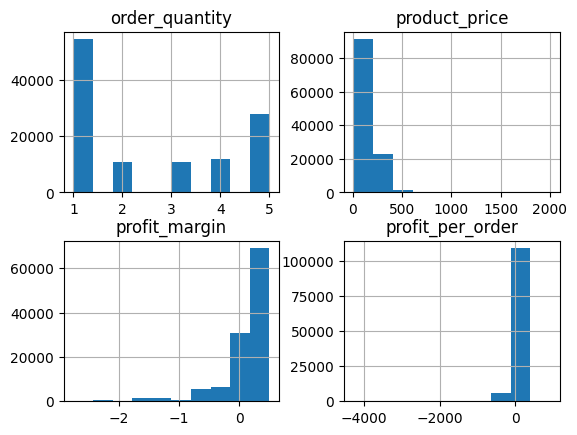

In [74]:
customer_order.hist()

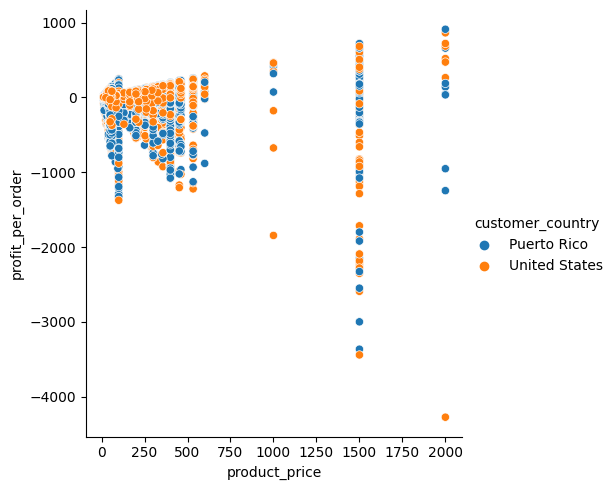

In [75]:
sns.relplot(x = 'product_price', y= 'profit_per_order', hue='customer_country',data = customer_order)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23872\3922961794.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_order['profit_margin'])


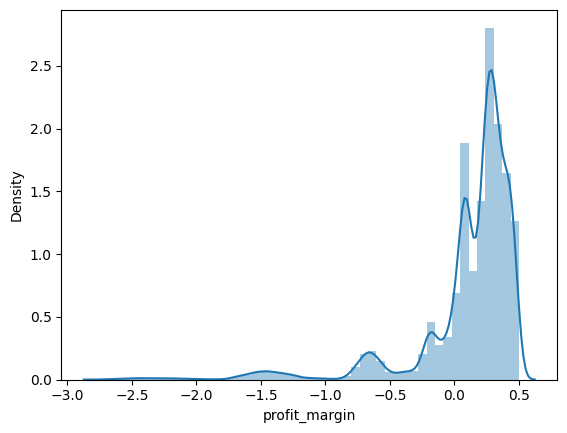

In [76]:
sns.distplot(customer_order['profit_margin'])
plt.show()

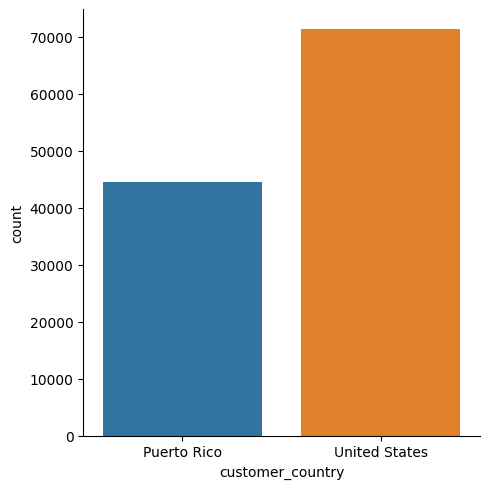

In [77]:
sns.catplot(x = 'customer_country', kind = 'count', data = customer_order)
plt.show()

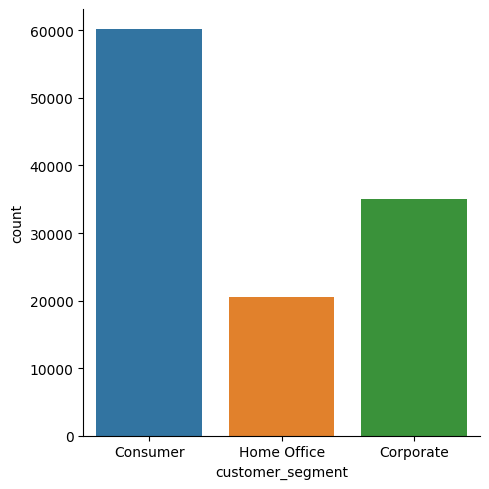

In [78]:
sns.catplot(x = 'customer_segment', kind = 'count', data = customer_order)
plt.show()